In [1]:
# Importing necessary libraries

# data manipulation
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# date library
from datetime import datetime

# time series librarires
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# statistical test - parametric and non-parametric
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from statsmodels.tsa.stattools import adfuller

# feature selection libraries

# Preparing data for modeling

In [2]:
data = pd.read_csv('../Rossmann_Store_Sales/Data/df.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data.shape

(844338, 22)

In [5]:
data_columns = data.columns

In [6]:
# columns with missing values
# StoreType
# log_competition_distance
nan_values = data.isna()
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan)

['StoreType', 'log_competition_distance']


In [7]:
data['StoreType'].fillna(data['StoreType'].mode()[0], inplace=True)

In [8]:
data['log_competition_distance'].fillna(data['log_competition_distance'].median(), inplace=True)

In [9]:
data.shape

(844338, 22)

In [10]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_per_Customer,Month,Year,Day,log_competition_distance,StateHoliday_tmp
0,1,5,2015-07-31,5263,555,1,1,1,3.0,1,...,0,0.0,0.0,0,9.482883,7,2015,31,7.146772,0
1,2,5,2015-07-31,6064,625,1,1,1,1.0,1,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31,6.345636,0
2,3,5,2015-07-31,8314,821,1,1,1,1.0,1,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31,9.556055,0
3,4,5,2015-07-31,13995,1498,1,1,1,3.0,3,...,0,0.0,0.0,0,9.342457,7,2015,31,6.429719,0
4,5,5,2015-07-31,4822,559,1,1,1,1.0,1,...,0,0.0,0.0,0,8.626118,7,2015,31,10.305948,0


In [11]:
# Create variable log_sales for further analysis
data['log_sales'] = np.log(data['Sales'])

## RMSPE function

In [12]:
def RMSPE(y, y_hat):
    return np.sqrt(np.mean((y_hat/y-1)**2))

In [13]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

## Train-test split for Time Series Analysis

In [14]:
train_size = int(len(data)*0.7)

In [15]:
data.sort_values(by=['Date'],inplace=True,ascending=True)

In [16]:
train, test = data[:train_size], data[train_size:]

In [17]:
train.shape

(591036, 23)

In [18]:
test.shape

(253302, 23)

In [20]:
# Fit an ARIMA model
import pmdarima as pm

In [21]:
arima = pm.ARIMA(order=(7, 0, 0))
arima.fit(train.Sales)

ARIMA(maxiter=50, method='lbfgs', order=(7, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [22]:
# predictions on test data
y_hat = arima.predict(n_periods=test.shape[0])

# error on test data
print(f"RMSPE on test data: {RMSPE(test.Sales, y_hat)}")

RMSPE on test data: 0.6285611462218297


In [23]:
test_ = test.copy()
test_['Predicted'] = y_hat

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


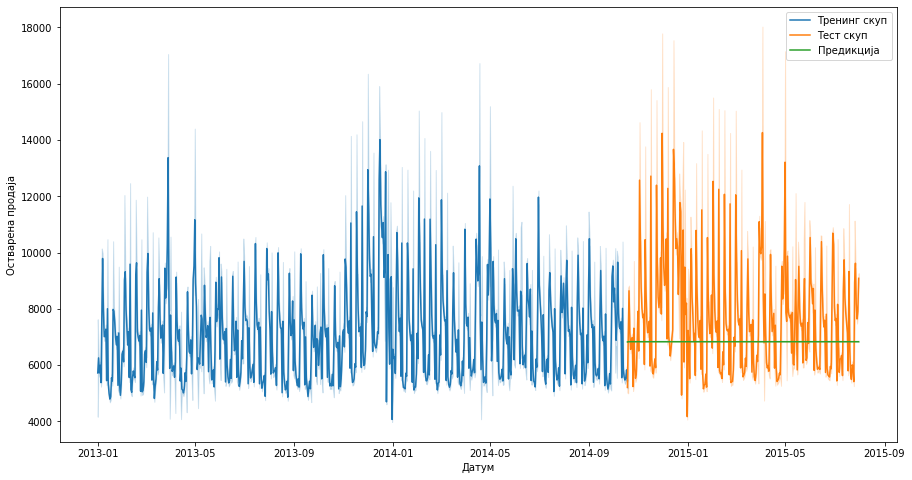

In [24]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train.Date,y=train.Sales, label='Тренинг скуп')
sns.lineplot(x=test.Date,y=test.Sales, label='Тест скуп')
sns.lineplot(x=test_.Date,y=test_.Predicted, label='Предикција')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја')

plt.legend()

## Train on january 2013. data and predict values of the first week of february 2013.

In [19]:
date_before = pd.Timestamp(2013, 2, 1)
date_after = pd.Timestamp(2012, 12, 31)
date_end = pd.Timestamp(2013, 2, 7)

In [20]:
store=1115

In [21]:
train_1115, test_1115 = train[(train.Store==store) & (train.Date>date_after) & (train.Date<date_before)], train[(train.Store==store) & (train.Date>=date_before) & (train.Date<=date_end)]

In [22]:
# train_1115

In [23]:
# test_1115

In [24]:
# Import pmdarima library
import pmdarima as pm

In [25]:
arima = pm.ARIMA(order=(2, 1, 2))

In [26]:
arima

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [27]:
arima.fit(train_1115.Sales)

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [28]:
# predictions on test data
y_hat, conf_int = arima.predict(n_periods=6, return_conf_int=True, alpha=0.05)

# error on test data
print(f"RMSPE on test data: {RMSPE(test_1115.Sales, y_hat)}")

RMSPE on test data: 0.17581284037117814


In [29]:
test_1115['lower_bound'] =conf_int[:, 0]

test_1115['upper_bound'] = conf_int[:, 1]

test_1115['Predicted'] = y_hat

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [30]:
test_1115

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Sales_per_Customer,Month,Year,Day,log_competition_distance,StateHoliday_tmp,log_sales,lower_bound,upper_bound,Predicted
477706,1115,6,2014-02-01,7490,489,1,0,0,1.0,3,...,15.316973,2,2014,1,8.584852,0,8.921324,3397.593649,8348.864734,5873.229192
476575,1115,1,2014-02-03,8646,542,1,1,0,1.0,3,...,15.952030,2,2014,3,8.584852,0,9.064852,2591.689766,8973.033563,5782.361664
475462,1115,2,2014-02-04,6703,450,1,1,0,1.0,3,...,14.895556,2,2014,4,8.584852,0,8.810310,2634.737536,9238.506636,5936.622086
474349,1115,3,2014-02-05,6148,413,1,1,0,1.0,3,...,14.886199,2,2014,5,8.584852,0,8.723882,2421.398770,9371.548399,5896.473584
473236,1115,4,2014-02-06,6461,416,1,1,0,1.0,3,...,15.531250,2,2014,6,8.584852,0,8.773539,2479.835652,9495.683013,5987.759332
472123,1115,5,2014-02-07,6621,457,1,1,0,1.0,3,...,14.487965,2,2014,7,8.584852,0,8.798002,2432.567154,9549.292474,5990.929814


/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


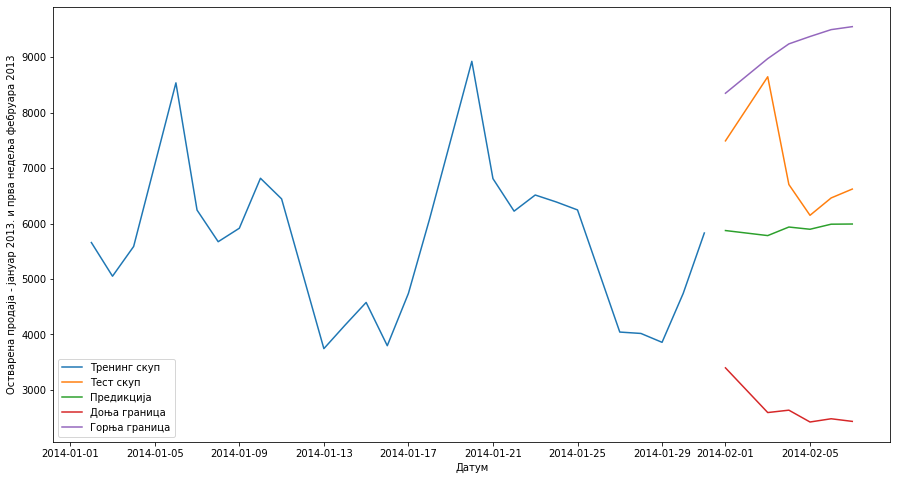

In [31]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција')
sns.lineplot(x=test_1115.Date,y=test_1115.lower_bound, label='Доња граница')
sns.lineplot(x=test_1115.Date,y=test_1115.upper_bound, label='Горња граница')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend()

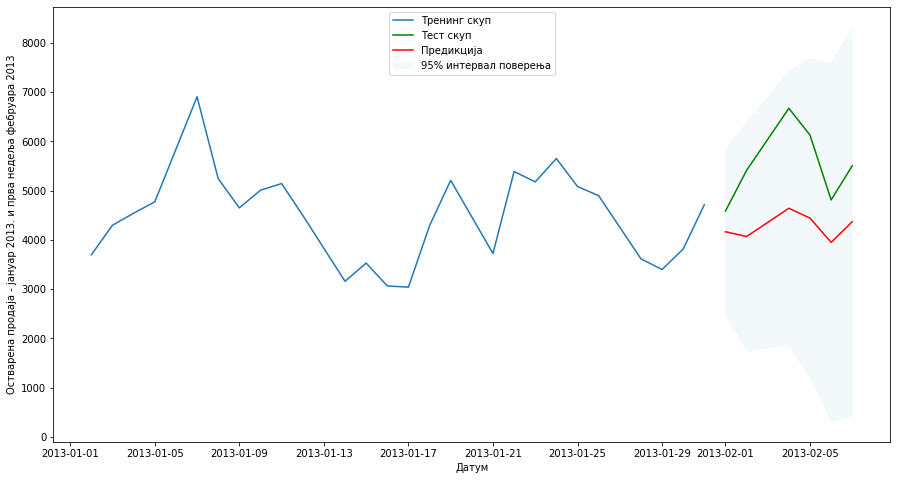

In [60]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper center')

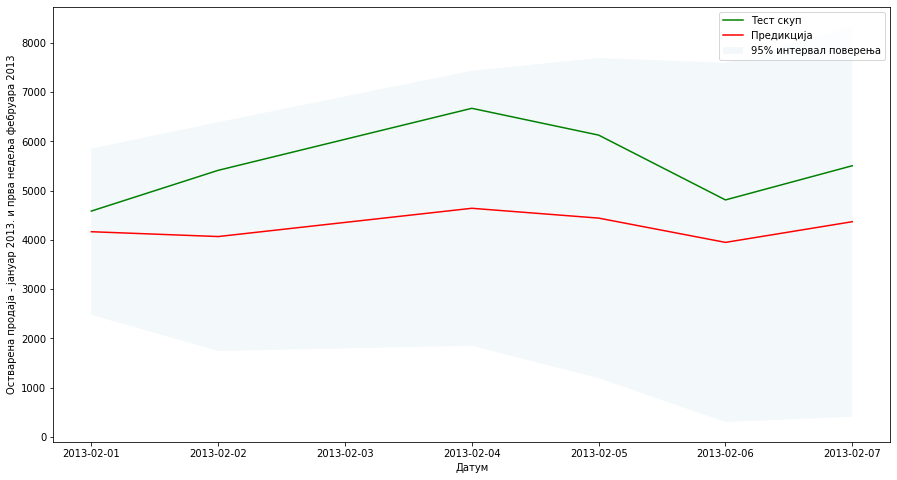

In [62]:
plt.figure(figsize=(15,8))

sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper right')

In [50]:
store=1115

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSPE on test data: 0.22843647749507082


/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

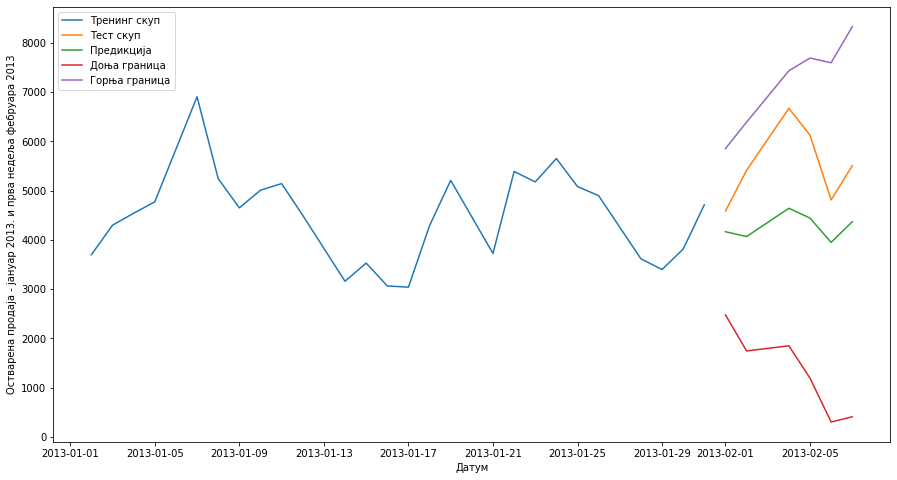

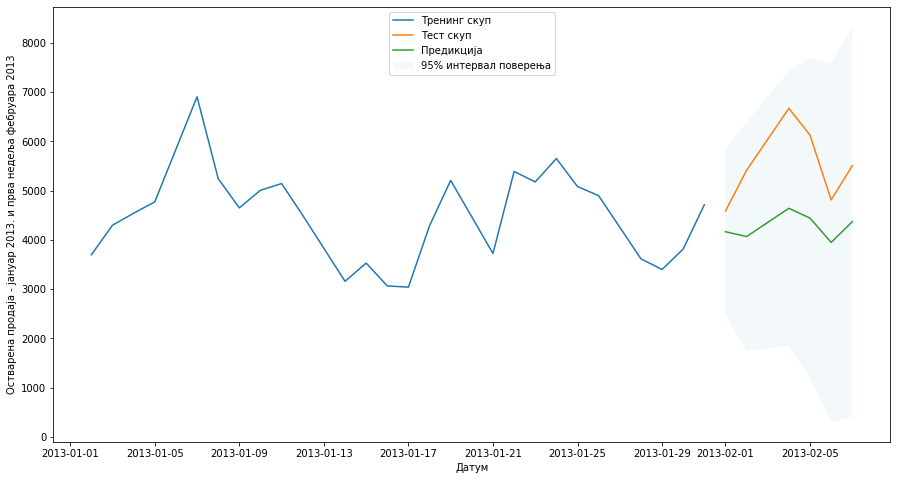

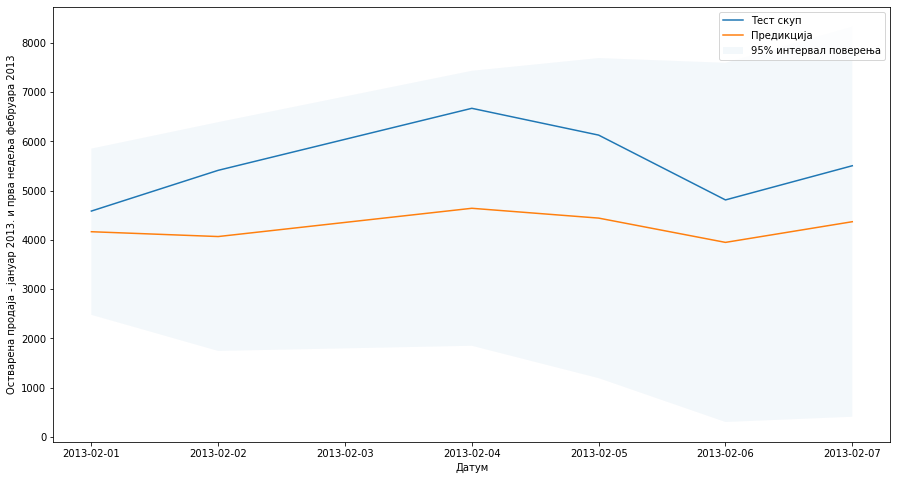

In [70]:
date_before = pd.Timestamp(2013, 2, 1)
date_after = pd.Timestamp(2012, 12, 31)
date_end = pd.Timestamp(2013, 2, 7)



train_1115, test_1115 = train[(train.Store==store) & (train.Date>date_after) & (train.Date<date_before)], train[(train.Store==store) & (train.Date>=date_before) & (train.Date<=date_end)]

# train_1115

# test_1115

# Import pmdarima library
import pmdarima as pm

arima = pm.ARIMA(order=(2, 1, 2))

""""
# Find optimal parameters p, d, q
arima = pm.auto_arima(train_1115['Sales'], seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=31,
                     max_order=None, trace=True)
"""

arima

arima.fit(train_1115.Sales)

# predictions on test data
y_hat, conf_int = arima.predict(n_periods=6, return_conf_int=True, alpha=0.05)

# error on test data
print(f"RMSPE on test data: {RMSPE(test_1115.Sales, y_hat)}")

test_1115['lower_bound'] =conf_int[:, 0]
test_1115['upper_bound'] = conf_int[:, 1]
test_1115['Predicted'] = y_hat

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција')
sns.lineplot(x=test_1115.Date,y=test_1115.lower_bound, label='Доња граница')
sns.lineplot(x=test_1115.Date,y=test_1115.upper_bound, label='Горња граница')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend()

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper center')

plt.figure(figsize=(15,8))

sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper right')

## Train on  2013. data and predict values of the first week of january 2014.

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RMSPE on test data: 0.15297504999907524


/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 1080x576 with 0 Axes>

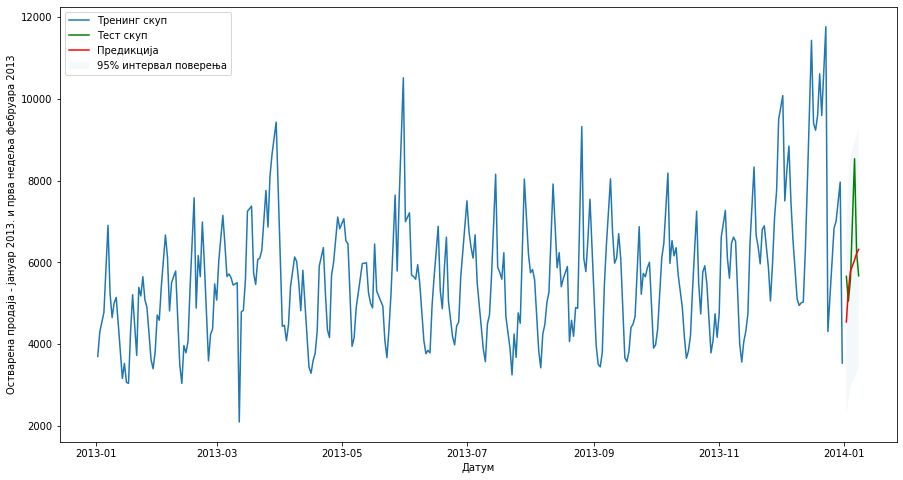

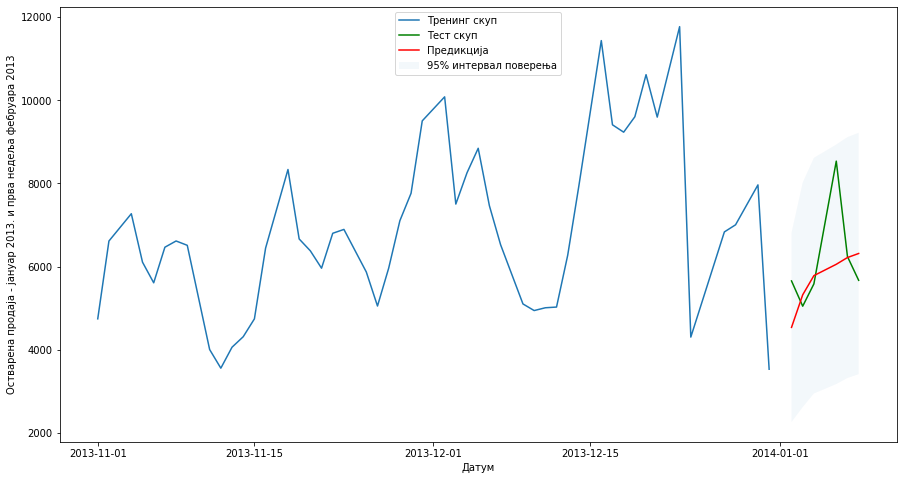

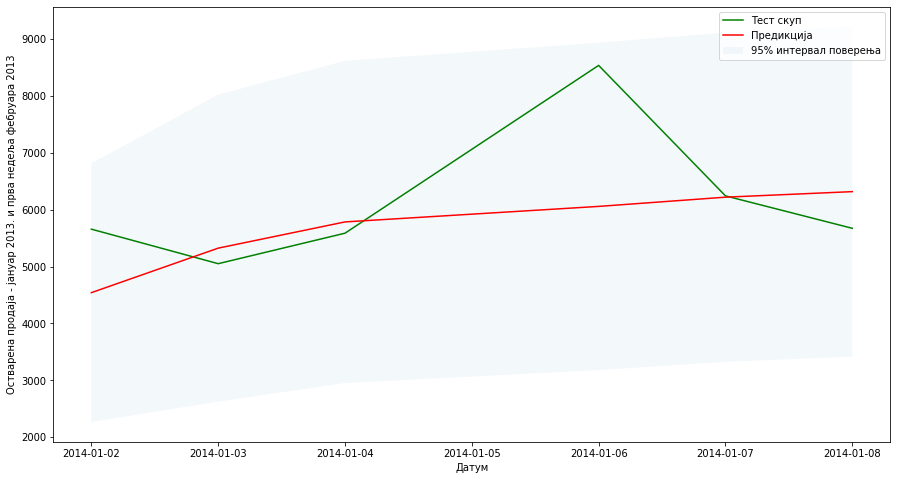

In [79]:
date_before = pd.Timestamp(2014, 1, 1)
date_after = pd.Timestamp(2013, 12, 31)
date_end = pd.Timestamp(2014, 1, 8)



train_1115, test_1115 = train[(train.Store==store) & (train.Date<date_before)], train[(train.Store==store) & (train.Date>=date_before) & (train.Date<=date_end)]

# train_1115

# test_1115

# Import pmdarima library
import pmdarima as pm

arima = pm.ARIMA(order=(1, 1, 2))

""""
# Find optimal parameters p, d, q
arima = pm.auto_arima(train_1115['Sales'], seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=31,
                     max_order=None, trace=True)
"""

arima

arima.fit(train_1115.Sales)

# predictions on test data
y_hat, conf_int = arima.predict(n_periods=6, return_conf_int=True, alpha=0.05)

# error on test data
print(f"RMSPE on test data: {RMSPE(test_1115.Sales, y_hat)}")

test_1115['lower_bound'] =conf_int[:, 0]
test_1115['upper_bound'] = conf_int[:, 1]
test_1115['Predicted'] = y_hat

plt.figure(figsize=(15,8))

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend()

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.iloc[-50:,:].Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper center')

plt.figure(figsize=(15,8))

sns.lineplot(x=test_1115.iloc[-30:,:].Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=.05, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper right')

## Train on 2013. and 2014. up to August 2014. data and predict values of the next six weeks in August and Seprember 2014.

In [90]:
conf_alpha = 0.4

RMSPE on test data: 0.27067032016972165


/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

<Figure size 1080x576 with 0 Axes>

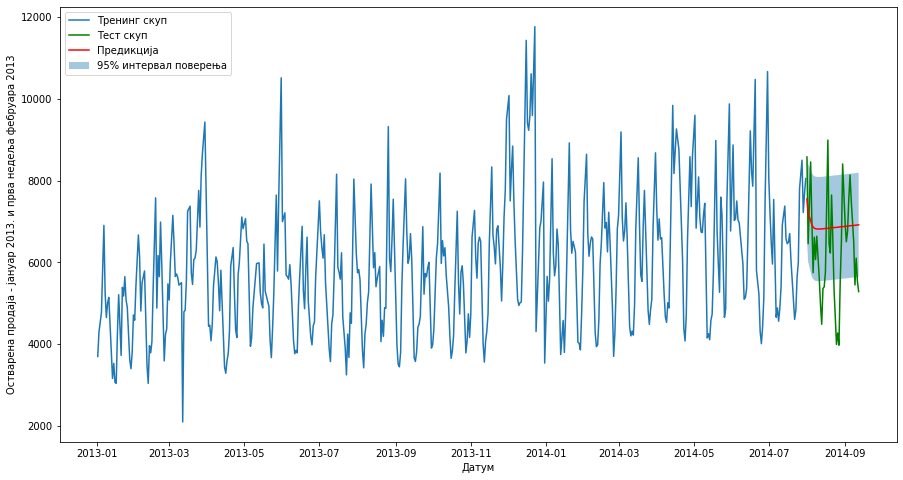

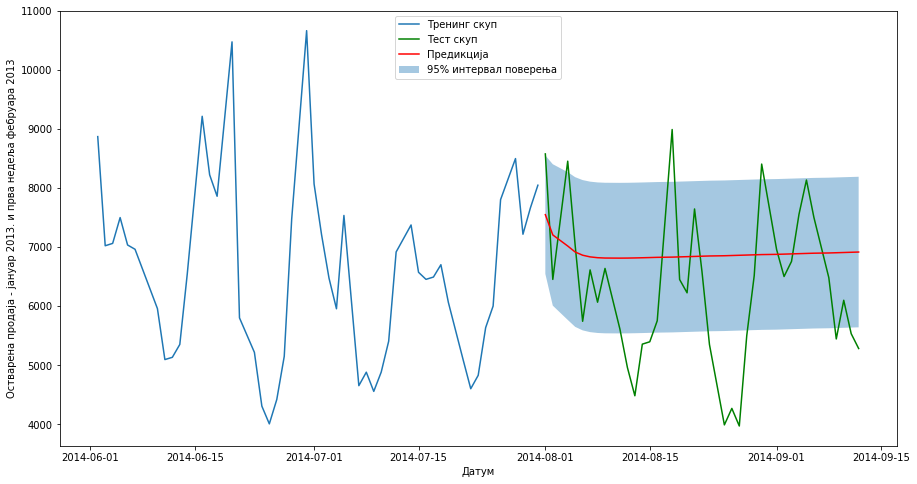

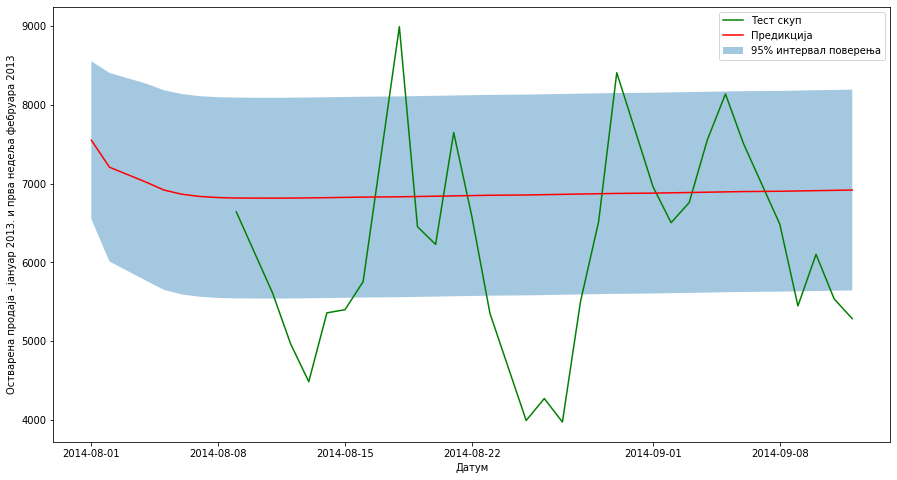

In [91]:
date_before = pd.Timestamp(2014, 8, 1)
date_after = pd.Timestamp(2013, 12, 31)
date_end = pd.Timestamp(2014, 9, 12)


train_1115, test_1115 = train[(train.Store==store) & (train.Date<date_before)], train[(train.Store==store) & (train.Date>=date_before) & (train.Date<=date_end)]

# train_1115

# test_1115

# Import pmdarima library
import pmdarima as pm

arima = pm.ARIMA(order=(1, 1, 2))

""""
# Find optimal parameters p, d, q
arima = pm.auto_arima(train_1115['Sales'], seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=31,
                     max_order=None, trace=True)
"""

arima

arima.fit(train_1115.Sales)

# predictions on test data
y_hat, conf_int = arima.predict(n_periods=37, return_conf_int=True, alpha=conf_alpha)

# error on test data
print(f"RMSPE on test data: {RMSPE(test_1115.Sales, y_hat)}")

test_1115['lower_bound'] =conf_int[:, 0]
test_1115['upper_bound'] = conf_int[:, 1]
test_1115['Predicted'] = y_hat

plt.figure(figsize=(15,8))

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=conf_alpha, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend()

plt.figure(figsize=(15,8))

sns.lineplot(x=train_1115.iloc[-50:,:].Date,y=train_1115.Sales, label='Тренинг скуп')
sns.lineplot(x=test_1115.Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=conf_alpha, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper center')

plt.figure(figsize=(15,8))

sns.lineplot(x=test_1115.iloc[-30:,:].Date,y=test_1115.Sales, label='Тест скуп', color='green')
sns.lineplot(x=test_1115.Date,y=test_1115.Predicted, label='Предикција', color='red')
plt.fill_between(test_1115.Date, test_1115.lower_bound, test_1115.upper_bound, alpha=conf_alpha, label='95% интервал поверења')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја - јануар 2013. и прва недеља фебруара 2013')
plt.legend(loc='upper right')

## Predicting Sales in February 2014. using all 2013. and january 2014. data

In [62]:
################################################################################################

In [166]:
train_500, test_500 = train[train.Store==1115], test[test.Store==1115]

In [167]:
arima = pm.ARIMA(order=(21, 1, 21))
arima.fit(train_500.Sales)

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(maxiter=50, method='lbfgs', order=(21, 1, 21), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [168]:
# predictions on test data
y_hat = arima.predict(n_periods=test_500.shape[0])

test_500['Predicted']=y_hat

# error on test data
print(f"RMSPE on test data: {RMSPE(test_500.Sales, y_hat)}")

RMSPE on test data: 0.25071165191610933


/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


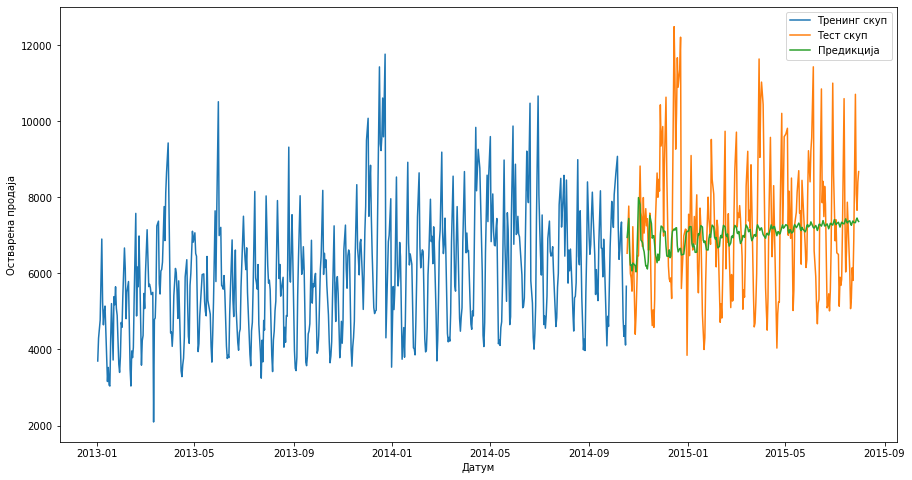

In [169]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train_500.Date,y=train_500.Sales, label='Тренинг скуп')
sns.lineplot(x=test_500.Date,y=test_500.Sales, label='Тест скуп')
sns.lineplot(x=test_500.Date,y=test_500.Predicted, label='Предикција')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја')

plt.legend()

In [172]:
# Fit a simple auto_arima model
arima_model = pm.ARIMA(order=(21, 1, 21))

In [ ]:
arima_model.fit(train.log_sales)

# predictions on training data
y_hat = arima_model.predict(n_periods=test.shape[0])

data__ = test.copy()
data__['Predicted']=y_hat

data__.head()

plt.figure(figsize=(15,8))

sns.lineplot(x=train.Date,y=train[train.Store==690].Sales, label='Тренинг скуп')
sns.lineplot(x=data__.Date,y=data__[data__.Store==690].Sales, label='Тест скуп')
sns.lineplot(x=data__.Date,y=data__[data__.Store==690].Predicted, label='Предикција')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја')

plt.legend()

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# Time Series - pmarima [only Sales variable used for predictions]

In [124]:
# Fit an ARIMA model
import pmdarima as pm

arima = pm.ARIMA(order=(1, 1, 2))
arima.fit(train.Sales)

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [125]:
# predictions on training data
y_hat = arima.predict(n_periods=train.shape[0])

# error on training data
print(f"RMSPE on train data: {RMSPE(train.Sales, y_hat)}")

RMSPE on train data: 0.5063271601616923


In [126]:
# predictions on test data
y_hat = arima.predict(n_periods=test.shape[0])

# error on test data
print(f"RMSPE on test data: {RMSPE(test.Sales, y_hat)}")

RMSPE on test data: 0.5191356715006743


# Time Series using statsmodels.tsa.arima_model

In [408]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
arima_model = ARIMA(train.Sales, order=(0, 1, 2))

In [46]:
arima_model.fit(disp=0)

In [49]:
y_hat = arima_model.predict(test.Sales, typ='levels')

In [52]:
# error on test data
# print(f"RMSPE on test data: {RMSPE(test.Sales, y_hat)}")

# Time Series predictions

In [21]:
import pmdarima as pm

In [410]:
# Fit a simple auto_arima model
arima_model = pm.ARIMA(order=(1, 0, 2))

## Time Series - Sales variable

In [41]:
arima_model.fit(train.Sales)

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [42]:
# predictions on training data
y_hat = arima_model.predict(n_periods=train.shape[0])

# error on training data
print(f"RMSPE on train data: {RMSPE(train.Sales, y_hat)}")

RMSPE on train data: 0.6451375064641446


In [43]:
# predictions on test data
y_hat = arima_model.predict(n_periods=test.shape[0])

# error on test data
print(f"RMSPE on test data: {RMSPE(test.Sales, y_hat)}")

RMSPE on test data: 0.7075226691329336


## Time Series - log_sales variable

In [409]:
arima_model.fit(train.log_sales)

NameError: name 'arima_model' is not defined

In [38]:
# predictions on training data
y_hat = arima_model.predict(n_periods=train.shape[0])

# error on training data
print(f"RMSPE on train data: {RMSPE(train.Sales, np.exp(y_hat))}")

RMSPE on train data: 0.7456215945179046


In [39]:
# predictions on test data
y_hat = arima_model.predict(n_periods=test.shape[0])

# error on test data
print(f"RMSPE on test data: {RMSPE(test.Sales, np.exp(y_hat))}")

RMSPE on test data: 0.5389116941943365


In [411]:
arima = pm.ARIMA(order=(0, 1, 2))
arima.fit(train.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=test.shape[0])

data__ = test.copy()
data__['Predicted']=y_hat

In [412]:
data__.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Sales_per_Customer,Month,Year,Day,log_competition_distance,StateHoliday_tmp,log_sales,Predicted
252742,62,6,2014-10-18,3674,420,1,0,0,1.0,1,...,0.0,0,8.747619,10,2014,18,7.625595,0,8.209036,5157.377649
252741,61,6,2014-10-18,3805,522,1,0,0,1.0,3,...,2012.0,"Jan,Apr,Jul,Oct",7.289272,10,2014,18,5.857933,0,8.244071,5159.889827
252740,60,6,2014-10-18,5177,435,1,0,0,1.0,3,...,0.0,0,11.901149,10,2014,18,8.619750,0,8.551981,5159.893704
252739,59,6,2014-10-18,2560,302,1,0,0,1.0,3,...,2011.0,"Jan,Apr,Jul,Oct",8.476821,10,2014,18,7.951559,0,7.847763,5159.897582
252738,57,6,2014-10-18,5947,606,1,0,0,1.0,3,...,0.0,0,9.813531,10,2014,18,6.040255,0,8.690642,5159.901459


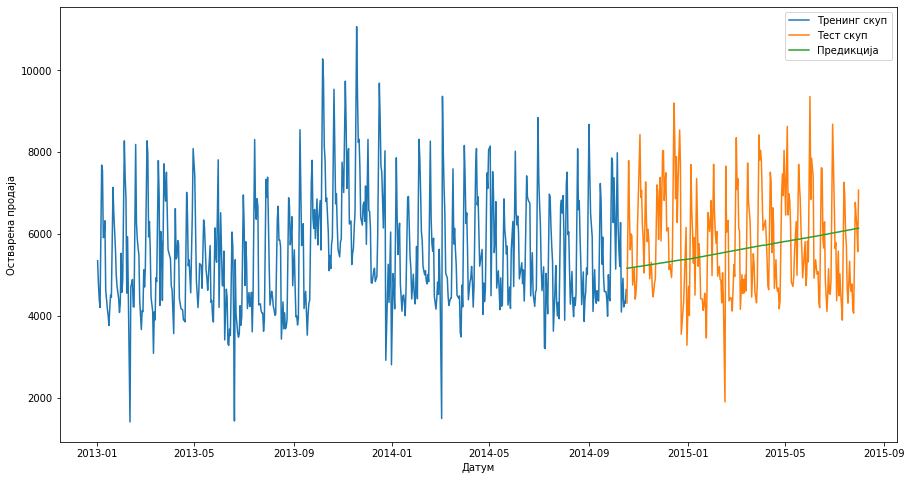

In [429]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train.Date,y=train[train.Store==690].Sales, label='Тренинг скуп')
sns.lineplot(x=data__.Date,y=data__[data__.Store==690].Sales, label='Тест скуп')
sns.lineplot(x=data__.Date,y=data__[data__.Store==690].Predicted, label='Предикција')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја')

plt.legend()

In [62]:
# prediction on test data
y_hat = xgb_opt.predict(test[tmp_cols])
test_ = test.copy()

test_['Predicted']=np.exp(y_hat)

test_.loc[test_.Open==0, 'Predicted']=0

In [63]:
# error on test data
print(f"RMSPE on test data: {RMSPE(y_test, np.exp(y_hat))}")

RMSPE on test data: 0.7137731237056221


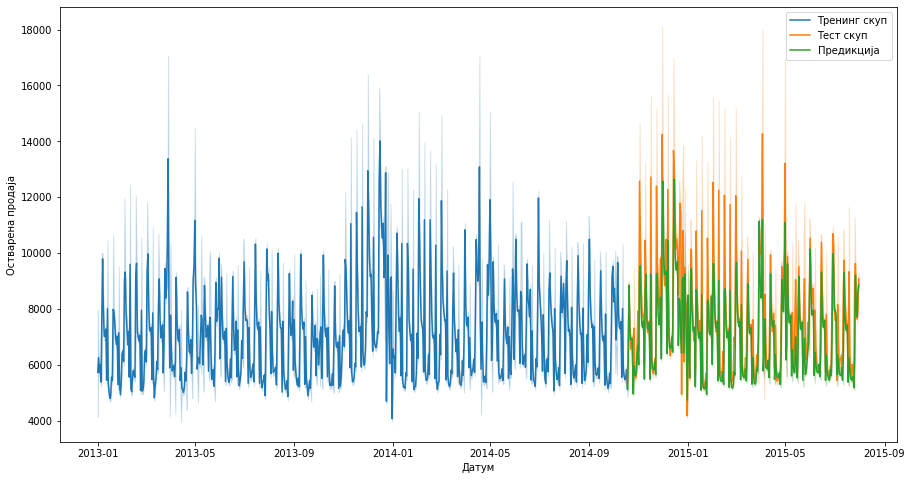

In [64]:
plt.figure(figsize=(15,8))

sns.lineplot(x=train.Date,y=train.Sales, label='Тренинг скуп')
sns.lineplot(x=test.Date,y=test.Sales, label='Тест скуп')
sns.lineplot(x=test_.Date,y=test_.Predicted, label='Предикција')

plt.xlabel("Датум")
plt.ylabel('Остварена продаја')

plt.legend()

# Linear Regression

In [414]:
# train and test data will be created using sklearn's train_test_split
from sklearn.linear_model import LinearRegression

## Linear Regression - train_test_split

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
tmp_cols = ['DayOfWeek', 'Promo', 'Store',
           'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'Month',
           'Year', 'Day', 'log_competition_distance']

In [417]:
X_train, X_test, y_train, y_test = train_test_split(data[tmp_cols], data['Sales'], test_size=0.3, random_state=69)

## Linear Regression - Sales variable

In [418]:
ln_model = LinearRegression(normalize=True)

In [419]:
ln_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [420]:
# predictions on training data
y_hat = ln_model.predict(X_train)

# error on training data
print(f"RMSPE on train data: {RMSPE(y_train, y_hat)}")

RMSPE on train data: 0.5245819717728398


In [421]:
# prediction on test data
y_hat = ln_model.predict(X_test)

# error on test data
print(f"RMSPE on test data: {RMSPE(y_test, y_hat)}")

RMSPE on test data: 0.4973155365486486


In [422]:
test_ = test.copy()
test_['Predicted'] = y_hat

In [423]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales_per_Customer,Month,Year,Day,log_competition_distance,StateHoliday_tmp,log_sales
844337,1097,2,2013-01-01,5961,1405,1,0,1,2.0,2,...,0.0,0.0,0,4.242705,1,2013,1,6.579251,1,8.692994
844321,85,2,2013-01-01,4220,619,1,0,1,2.0,1,...,0.0,0.0,0,6.817447,1,2013,1,7.533694,1,8.347590
844322,259,2,2013-01-01,6851,1444,1,0,1,2.0,2,...,0.0,0.0,0,4.744460,1,2013,1,5.347108,1,8.832150
844323,262,2,2013-01-01,17267,2875,1,0,1,2.0,1,...,0.0,0.0,0,6.005913,1,2013,1,7.073270,1,9.756552
844324,274,2,2013-01-01,3102,729,1,0,1,2.0,2,...,10.0,2013.0,"Jan,Apr,Jul,Oct",4.255144,1,2013,1,8.199739,1,8.039802


## Linear Regression - log_sales variable

In [424]:
ln_model = LinearRegression(normalize=True)

In [425]:
ln_model.fit(X_train, np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [426]:
# predictions on training data
y_hat = ln_model.predict(X_train)

# error on training data
print(f"RMSPE on train data: {RMSPE(y_train, np.exp(y_hat))}")

RMSPE on train data: 0.4728950173833056


In [427]:
# prediction on test data
y_hat = ln_model.predict(X_test)

# error on test data
print(f"RMSPE on test data: {RMSPE(y_test, np.exp(y_hat))}")

RMSPE on test data: 0.4457044978922241


# XGBoost

In [136]:
# train and test data will be created using sklearn's train_test_split

In [43]:
# import XGBRegressor library
from xgboost.sklearn import XGBRegressor

## XGBoost - train_test_split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
tmp_cols = ['DayOfWeek', 'Promo', 'Store',
           'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'Month',
           'Year', 'Day', 'log_competition_distance']

In [46]:
tmp_cols_ = ['DayOfWeek', 'Promo',
           'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2',
           'Promo2SinceYear', 'Month',
           'Year', 'Day', 'log_competition_distance']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data[tmp_cols], data['Sales'], test_size=0.3, random_state=69)

In [145]:
def rmspe_xg(y, y_hat):
    y = np.expm1(y.get_label())
    y_hat = np.expm1(y_hat)
    return "rmspe", rmspe(y,y_hat)

## XGBoost - Sales variable

In [113]:
xgb_model = XGBRegressor()

In [114]:
xgb_model.fit(X_train, y_train)

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [116]:
# predictions on training data
y_hat = xgb_model.predict(X_train)

In [117]:
# error on training data
RMSPE(y_train, y_hat)

0.4881520519990625

In [118]:
# prediction on test data
y_hat = xgb_model.predict(X_test)

In [119]:
# error on test data
RMSPE(y_test, y_hat)

0.44728298236866176

## XGBoost - log_sales variable

In [ ]:
xgb_model = XGBRegressor()

In [120]:
xgb_model.fit(X_train, np.log(y_train))

[22:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [121]:
# predictions on training data
y_hat = xgb_model.predict(X_train)

In [122]:
# error on training data
RMSPE(y_train, np.exp(y_hat))

0.4223783633675941

In [123]:
# prediction on test data
y_hat = xgb_model.predict(X_test)

In [124]:
# error on test data
RMSPE(y_test, np.exp(y_hat))

0.3884235719928909

## XGBoost - optimized on Sales variable

In [146]:
# instantiate XGBRegressor class
xgb_opt = XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

In [132]:
xgb_opt.fit(X_train, y_train)

[23:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

In [134]:
# predictions on training data
y_hat = xgb_opt.predict(X_train)

# error on training data
print(f"RMSPE on train data: {RMSPE(y_train, y_hat)}")

RMSPE on train data: 0.41935905176074434


In [135]:
# prediction on test data
y_hat = xgb_opt.predict(X_test)

# error on test data
print(f"RMSPE on test data: {RMSPE(y_test, y_hat)}")

RMSPE on test data: 0.3720715540266975


## XGBoost - optimized on log_sales variable

In [49]:
# instantiate XGBRegressor class
xgb_opt = XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

In [ ]:
xgb_opt.fit(X_train, np.log(y_train))

In [129]:
# predictions on training data
y_hat = xgb_opt.predict(X_train)

# error on training data
print(f"RMSPE on train data: {RMSPE(y_train, np.exp(y_hat)}")

0.36327513822931334

In [130]:
# prediction on test data
y_hat = xgb_opt.predict(X_test)

# error on test data
RMSPE(y_test, np.exp(y_hat))

0.32080568167602996

XGBoost model with the very best results on both train and test data is  
XGBRegressor(  
      n_jobs = -1,  
      n_estimators = 1000,  
      eta = 0.1,  
      max_depth = 2,  
      min_child_weight = 2,  
      subsample = 0.8,  
      colsample_bytree = 0.8,  
      tree_method = 'exact',  
      reg_alpha = 0.05,  
      silent = 0,  
      random_state = 1023  
)  
and this model will be used as XGBoost representative

# -------------------------------------------------------------------------------------------

# ----------------------------- TEST DATA SET ------------------------------------------

# Load test data set and handle missing values

In [25]:
data_ = pd.read_csv('../Rossmann_Store_Sales/Data/test.csv', index_col=0)

In [26]:
store = pd.read_csv("../Rossmann_Store_Sales/Data/store.csv", index_col=0)

In [27]:
data_.shape

(41088, 7)

In [28]:
data_[pd.isnull(data_.Open)]

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
480,622,4,2015-09-17,NaN,1,0,0
1336,622,3,2015-09-16,NaN,1,0,0
2192,622,2,2015-09-15,NaN,1,0,0
3048,622,1,2015-09-14,NaN,1,0,0
4760,622,6,2015-09-12,NaN,0,0,0
5616,622,5,2015-09-11,NaN,0,0,0
6472,622,4,2015-09-10,NaN,0,0,0
7328,622,3,2015-09-09,NaN,0,0,0
8184,622,2,2015-09-08,NaN,0,0,0


In [29]:
data_ = pd.merge(data_,right=store,how="left",on="Store")

In [30]:
data_.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [31]:
# columns with missing values
# StoreType
# log_competition_distance
nan_values = data_.isna()
nan_columns = nan_values.any()

columns_with_nan = data_.columns[nan_columns].tolist()
print(columns_with_nan)

['Open', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [32]:
# handle missing data for Open variable
data_.loc[pd.isnull(data_.Open), 'Open'] = 0

In [33]:
# add log_competition_distance variable
data_['log_competition_distance'] = np.log(data_.CompetitionDistance)

In [34]:
# drop CompetitionDistance column
data_.drop('CompetitionDistance', axis=1, inplace=True)

In [35]:
# handle PromoInterval variable
data_.drop('PromoInterval', axis=1, inplace=True)

In [36]:
# handle missing data for log_competition_distance variable
data_['log_competition_distance'].fillna(data_['log_competition_distance'].median(), inplace=True)

In [37]:
# Handle CompetitionOpen_ missing values

data_.loc[pd.isnull(data_.CompetitionOpenSinceMonth), 'CompetitionOpenSinceMonth'] = 0
data_.loc[pd.isnull(data_.CompetitionOpenSinceYear), 'CompetitionOpenSinceYear'] = 0

In [38]:
# Handle Promo2_ missing values

data_.loc[pd.isnull(data_.Promo2SinceWeek), 'Promo2SinceWeek'] = 0
data_.loc[pd.isnull(data_.Promo2SinceYear), 'Promo2SinceYear'] = 0

In [39]:
# Add variables: Day | Month |Year
data_.Date = data_.Date.astype("datetime64[ns]")

data_["Month"] = data_.Date.dt.month
data_["Year"] = data_.Date.dt.year
data_["Day"] = data_.Date.dt.day

In [40]:
# Map categorical variables to numebers

data_["Assortment"] = data_["Assortment"].map({"d":4, "0": 0, "a": 1, "b": 2, "c": 3})
data_["StoreType"] = data_["StoreType"].map({"a": 1, "b": 2, "c": 3})

In [41]:
# function to handle missing StoreTypes
def handle_store_type():
    # get the list of unique stores for which there are missing values 
    stores = list(data_[pd.isnull(data_.StoreType)].Store.unique())
    
    for store_id in stores:
        # get StoreType from train data set
        store_type = data[data.Store==store_id].StoreType.unique()[0]

        # change StoreType in test dataset
        data_.loc[data_.Store==store_id, 'StoreType']=store_type

In [42]:
# handle missing StoreType values
handle_store_type()

# Liner regression model - SALES variable

In [335]:
# train model on a whole train set provided by Kaggle
ln_model.fit(data[tmp_cols], data.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [336]:
# prediction on test data
y_hat = ln_model.predict(data_[tmp_cols])

In [337]:
# Add column 'Sales' to test set
data_['Sales']=y_hat

In [338]:
# Predict 0 Sales when store is closed
data_.loc[data_.Open==0, 'Sales']=0

In [339]:
to_export = data_[['Sales']]

In [340]:
to_export.to_csv('lm_submissions.csv')

# result of this particular model, Score: 0.42558

# Linear Regression model - log(SALES) variable

In [341]:
# train model on a whole train set provided by Kaggle
ln_model.fit(data[tmp_cols], np.log(data.Sales))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [342]:
# prediction on test data
y_hat = ln_model.predict(data_[tmp_cols])

In [343]:
# Add column 'Sales' to test set
data_['Sales']=np.exp(y_hat)

In [344]:
# Predict 0 Sales when store is closed
data_.loc[data_.Open==0, 'Sales']=0

In [345]:
to_export = data_[['Sales']]

In [346]:
to_export.to_csv('lm_log_submissions.csv')

# result of this particular model, Score: 0.47942

# Time Series model - Sales variable AR(1)

In [65]:
arima = pm.ARIMA(order=(1, 0, 0))
arima.fit(data.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

len(y_hat)

y_hat

data_['Sales']=y_hat

data_.loc[data_.Open==0, 'Sales']=0

to_export = data_[['Sales']]

to_export.to_csv('ar_1_submissions.csv')

# result of this particular model, Score: 0.48985

# Time Series model - Sales variable AR(7)

In [68]:
arima = pm.ARIMA(order=(7, 0, 0))
arima.fit(data.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

len(y_hat)

y_hat

data_['Sales']=y_hat

data_.loc[data_.Open==0, 'Sales']=0

to_export = data_[['Sales']]

to_export.to_csv('ar_7_submissions.csv')

# result of this particular model, Score: 0.64175

# Time Series model - Sales variable MA(1)

In [69]:
arima = pm.ARIMA(order=(0, 0, 1))
arima.fit(data.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

len(y_hat)

y_hat

data_['Sales']=y_hat

data_.loc[data_.Open==0, 'Sales']=0

to_export = data_[['Sales']]

to_export.to_csv('ma_1_submissions.csv')

# result of this particular model, Score: 0.4881

# Time Series model - Sales variable MA(7)

In [70]:
arima = pm.ARIMA(order=(0, 0, 7))
arima.fit(data.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

len(y_hat)

y_hat

data_['Sales']=y_hat

data_.loc[data_.Open==0, 'Sales']=0

to_export = data_[['Sales']]

to_export.to_csv('ma_7_submissions.csv')

# result of this particular model, Score: 0.64175

# Time Series model - Sales variable ARIMA(1, 1, 2)

In [127]:
arima = pm.ARIMA(order=(1, 1, 2))
arima.fit(data.Sales)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [129]:
# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

In [130]:
len(y_hat)

41088

In [131]:
y_hat

array([6232.86475806, 6229.58564322, 6232.85957082, ..., 6131.5326469 ,
       6131.57908428, 6131.52780004])

In [132]:
data_['Sales']=y_hat

In [150]:
data_.loc[data_.Open==0, 'Sales']=0

In [152]:
to_export = data_[['Sales']]

In [153]:
to_export.to_csv('submissions.csv')

# result of this particular model, Score: 0.41273

# Time Series model - log(Sales) variable ARIMA(1, 1, 2)

In [359]:
arima = pm.ARIMA(order=(1, 1, 2))
arima.fit(np.log(data.Sales))

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

# Add Sales column to test dataframe
data_['Sales'] = np.exp(y_hat)

# When store is closed, predict 0 Sales
data_.loc[data_.Open==0, 'Sales'] = 0

to_export = data_[['Sales']]

to_export.to_csv('ts_arima_log_1_1_2_submissions.csv')

# result of this particular model, Score: 0.37659

# Time Series model - Sales variable ARIMA(0, 1, 2)

In [347]:
arima = pm.ARIMA(order=(0, 1, 2))
arima.fit(data.Sales)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [348]:
# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

In [349]:
data_['Sales']=y_hat

In [350]:
data_.loc[data_.Open==0, 'Sales']=0

In [351]:
to_export = data_[['Sales']]

In [352]:
to_export.to_csv('ts_arima_0_1_2_submissions.csv')

# result of this particular model, Score: 0.40863

# Time Series model - log(Sales) variable ARIMA(0, 1, 2)

In [358]:
arima = pm.ARIMA(order=(0, 1, 2))
arima.fit(np.log(data.Sales))

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

# Add Sales column to test dataframe
data_['Sales'] = np.exp(y_hat)

# When store is closed, predict 0 Sales
data_.loc[data_.Open==0, 'Sales'] = 0

to_export = data_[['Sales']]

to_export.to_csv('ts_arima_log_0_1_2_submissions.csv')

# result of this particular model, Score: 0.38726

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Time Series model - Sales variable ARIMA(1, 0, 2)


In [355]:
arima = pm.ARIMA(order=(1, 0, 2))
arima.fit(data.Sales)

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

# Add Sales column to test dataframe
data_['Sales'] = y_hat

# When store is closed, predict 0 Sales
data_.loc[data_.Open==0, 'Sales'] = 0

to_export = data_[['Sales']]

to_export.to_csv('ts_arima_1_0_2_submissions.csv')

# result of this particular model, Score: 0.49878

# Time Series model - log(Sales) variable ARIMA(1, 0, 2)


In [357]:
arima = pm.ARIMA(order=(1, 0, 2))
arima.fit(np.log(data.Sales))

# predictions on training data
y_hat = arima.predict(n_periods=data_.shape[0])

# Add Sales column to test dataframe
data_['Sales'] = np.exp(y_hat)

# When store is closed, predict 0 Sales
data_.loc[data_.Open==0, 'Sales'] = 0

to_export = data_[['Sales']]

to_export.to_csv('ts_arima_log_1_0_2_submissions.csv')

# result of this particular model, Score: 0.41495

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Extreme Gradient Boosting model - SALES variable

In [148]:
xgb_opt.fit(data[tmp_cols], data.Sales)

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:55:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

In [156]:
data_.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,log_competition_distance,Sales,Month,Year
0,1,4,2015-09-17,1.0,1,0,0,c,a,9.0,2008.0,0,0.0,0.0,7.146772,6232.864758,9,2015
1,3,4,2015-09-17,1.0,1,0,0,a,a,12.0,2006.0,1,14.0,2011.0,9.556055,6229.585643,9,2015
2,7,4,2015-09-17,1.0,1,0,0,a,c,4.0,2013.0,0,0.0,0.0,10.085809,6232.859571,9,2015
3,8,4,2015-09-17,1.0,1,0,0,a,a,10.0,2014.0,0,0.0,0.0,8.925321,6229.581127,9,2015
4,9,4,2015-09-17,1.0,1,0,0,a,c,8.0,2000.0,0,0.0,0.0,7.615791,6232.854384,9,2015


In [171]:
# prediction on test data
y_hat = xgb_opt.predict(data_[tmp_cols])

In [172]:
data_['Sales']=y_hat

In [173]:
data_.loc[data_.Open==0, 'Sales']=0

In [174]:
to_export = data_[['Sales']]

In [175]:
to_export.to_csv('xgb_submissions.csv')

# result of this particular model, Score: 0.32697

# Extreme Gradient Boosting model - log(SALES) variable

In [50]:
xgb_opt.fit(data[tmp_cols], np.log(data.Sales))

/Users/mstevankovic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:55:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

In [51]:
# prediction on test data
y_hat = xgb_opt.predict(data_[tmp_cols])

In [52]:
data_['Sales']=np.exp(y_hat)

In [53]:
data_.loc[data_.Open==0, 'Sales']=0

In [180]:
to_export = data_[['Sales']]

to_export.to_csv('xgb_log_submissions.csv')

# result of this particular model, Score: 0.28725

In [183]:
xgb_opt.feature_importances_

array([0.03694022, 0.5585421 , 0.0193    , 0.00721321, 0.03957303,
       0.05074167, 0.01778249, 0.01188407, 0.12111403, 0.01704666,
       0.03510189, 0.02603111, 0.01557513, 0.02278581, 0.02036864],
      dtype=float32)

In [195]:
# import xgboost so that plot_importance feature could be used
import xgboost as xgb

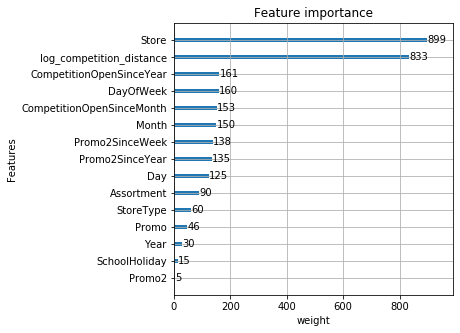

In [197]:
xgb.plot_importance(booster=xgb_opt,
                    xlabel='weight',
                    ylabel='Features'
)

#plt.rcParams['figure.figsize'] = [5, 5]
#plt.show()

In [222]:
feature_importance = pd.Series(xgb_opt.feature_importances_, index=tmp_cols).sort_values(ascending=False)
feature_importance

Promo                        0.558542
Promo2                       0.121114
Assortment                   0.050742
StoreType                    0.039573
DayOfWeek                    0.036940
Promo2SinceYear              0.035102
Month                        0.026031
Day                          0.022786
log_competition_distance     0.020369
Store                        0.019300
CompetitionOpenSinceMonth    0.017782
Promo2SinceWeek              0.017047
Year                         0.015575
CompetitionOpenSinceYear     0.011884
SchoolHoliday                0.007213
dtype: float32

## Plot xgboost feature importance

In [265]:
X_train, X_test, y_train, y_test = train_test_split(data[tmp_cols_], data['Sales'], test_size=0.3, random_state=69)

In [266]:
# instantiate XGBRegressor class
xgb_opt = XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

In [267]:
xgb_opt.fit(data[tmp_cols_], np.log(data.Sales))

[13:12:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

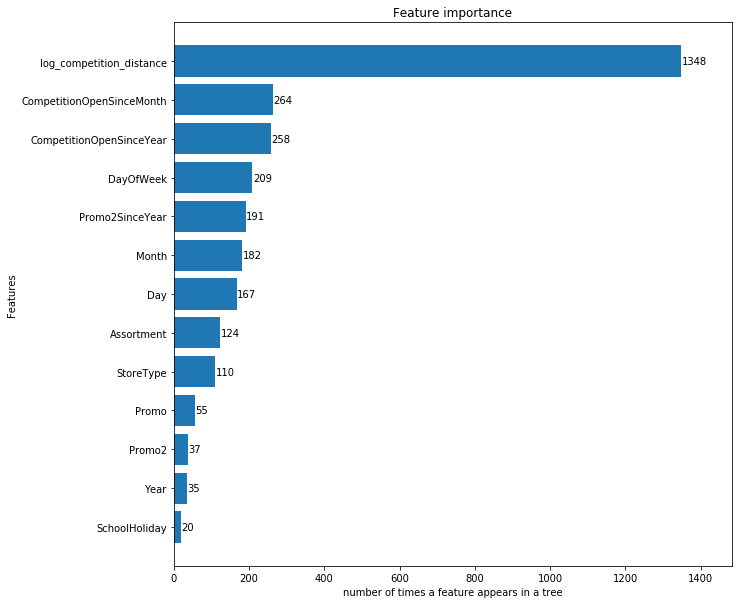

In [272]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_opt,
                    importance_type='weight',
                    height=0.8, 
                    ax=ax, 
                    xlabel='number of times a feature appears in a tree',
                    grid=False)
plt.show()

In [270]:
# DataFrame with feature importances listed
feature_importance = pd.Series(xgb_opt.feature_importances_, index=tmp_cols_).sort_values(ascending=False)
feature_importance

Promo                        0.637691
Assortment                   0.054896
DayOfWeek                    0.044609
Promo2SinceYear              0.042734
Promo2                       0.042577
StoreType                    0.038916
Month                        0.029493
Day                          0.026845
log_competition_distance     0.023981
Year                         0.019485
CompetitionOpenSinceYear     0.015748
CompetitionOpenSinceMonth    0.014964
SchoolHoliday                0.008060
dtype: float32